# Sales Data Analysis & Business Insights

This notebook performs exploratory data analysis on sales transaction data
to identify revenue trends, regional performance, and product insights.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.float_format", "{:.2f}".format)


In [16]:
df = pd.read_csv("data/sales_data.csv")
df.head()


,order_id,order_date,customer_id,product,category,quantity,unit_price,region
0,1001,2024-01-02,501,Laptop,Electronics,1,55000,North
1,1002,2024-01-02,502,Mouse,Electronics,2,500,North
2,1003,2024-01-03,503,Keyboard,Electronics,1,1200,East
3,1004,2024-01-03,504,Office Chair,Furniture,1,7000,West
4,1005,2024-01-04,505,Desk,Furniture,1,12000,South


In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     60 non-null     int64 
 1   order_date   60 non-null     object
 2   customer_id  60 non-null     int64 
 3   product      60 non-null     object
 4   category     60 non-null     object
 5   quantity     60 non-null     int64 
 6   unit_price   60 non-null     int64 
 7   region       60 non-null     object
dtypes: int64(4), object(4)
memory usage: 3.9+ KB


,order_id,customer_id,quantity,unit_price
count,60.00,60.00,60.00,60.00
mean,1030.50,530.50,1.78,14052.67
std,17.46,17.46,2.70,17259.48
min,1001.00,501.00,1.00,10.00
25%,1015.75,515.75,1.00,2100.00
50%,1030.50,530.50,1.00,4850.00
75%,1045.25,545.25,2.00,19000.00
max,1060.00,560.00,20.00,65000.00


## Dataset Overview

The dataset contains sales transactions with information about products,
categories, quantities, pricing, and sales regions.


In [18]:
# Check missing values
df.isna().sum()
# Convert date column
df["order_date"] = pd.to_datetime(df["order_date"])

# Ensure correct data types
df["quantity"] = df["quantity"].astype(int)
df["unit_price"] = df["unit_price"].astype(float)


In [19]:
# Create total_amount column
df["total_amount"] = df["quantity"] * df["unit_price"]

df.head()


,order_id,order_date,customer_id,product,category,quantity,unit_price,region,total_amount
0,1001,2024-01-02,501,Laptop,Electronics,1,55000.00,North,55000.00
1,1002,2024-01-02,502,Mouse,Electronics,2,500.00,North,1000.00
2,1003,2024-01-03,503,Keyboard,Electronics,1,1200.00,East,1200.00
3,1004,2024-01-03,504,Office Chair,Furniture,1,7000.00,West,7000.00
4,1005,2024-01-04,505,Desk,Furniture,1,12000.00,South,12000.00


## 1. Revenue by Region


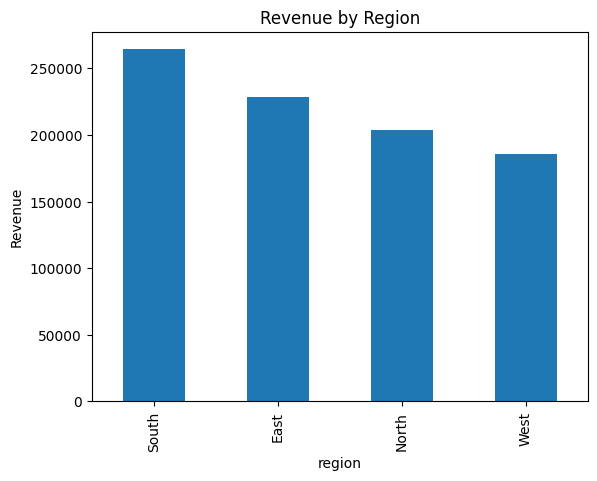

In [20]:
revenue_by_region = (
    df.groupby("region")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

revenue_by_region

revenue_by_region.plot(kind="bar", title="Revenue by Region")
plt.ylabel("Revenue")
plt.show()


## 2. Revenue by Category


In [21]:
revenue_by_category = (
    df.groupby("category")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

revenue_by_category


category
Electronics   562300.00
Appliances    177000.00
Furniture     112000.00
Apparel        16300.00
Accessories     8500.00
Stationery      5200.00
Name: total_amount, dtype: float64

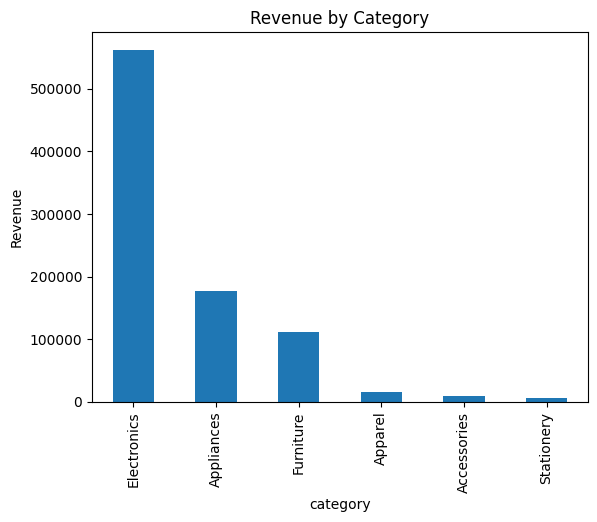

In [22]:
revenue_by_category.plot(kind="bar", title="Revenue by Category")
plt.ylabel("Revenue")
plt.show()


## 3. Top 5 Products by Revenue


In [23]:
top_products = (
    df.groupby("product")["total_amount"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_products


product
TV                65000.00
Laptop            55000.00
Air Conditioner   52000.00
Graphics Card     48000.00
Console           48000.00
Name: total_amount, dtype: float64

## 4. Monthly Revenue Trend


In [24]:
# Create month column (convert to string for plotting)
df["month"] = df["order_date"].dt.to_period("M").astype(str)

# Aggregate monthly revenue
monthly_revenue = (
    df.groupby("month", as_index=False)["total_amount"]
    .sum()
    .sort_values("month")
)

monthly_revenue


,month,total_amount
0,2024-01,881300.00


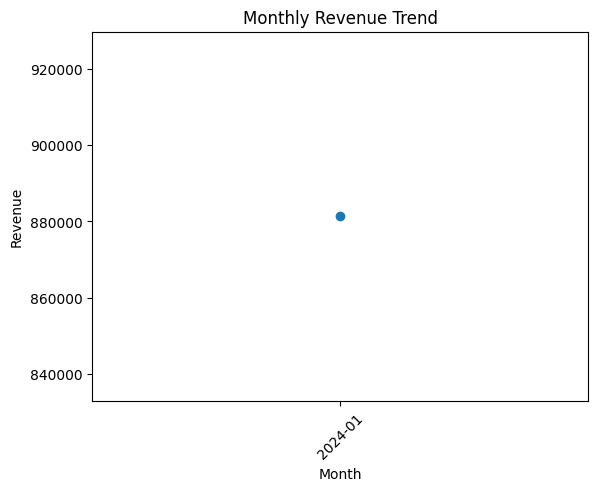

In [25]:
# Plot
plt.figure()
plt.plot(
    monthly_revenue["month"],
    monthly_revenue["total_amount"],
    marker="o"
)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


## Key Business Insights

- Electronics category contributes the highest revenue
- North and South regions show strong sales performance
- Revenue is driven by a small number of high-value products
- Sales show a consistent trend across the month
